In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pré convertido para utf-8
df = pd.read_csv('VIS_Pr_01_Vendas.csv')

In [3]:
df['order_year'] = pd.to_datetime(df['Order Date']).dt.strftime('%Y')

df = df.groupby(['Sub-Category','order_year']).agg(
    {
        'Profit': ['sum']
    }
).reset_index()

df.columns = ["_".join(t).strip('_').replace('-','_').lower() for t in df.columns]

df = df.pivot(index='sub_category', columns='order_year', values=['profit_sum']).reset_index()
df.columns = [(t[1] if ('profit_sum' in t) else t[0]) for t in df.columns]

In [4]:
sub_category = df['sub_category'].to_list()
values = df.drop('sub_category', axis=1).to_dict('list')

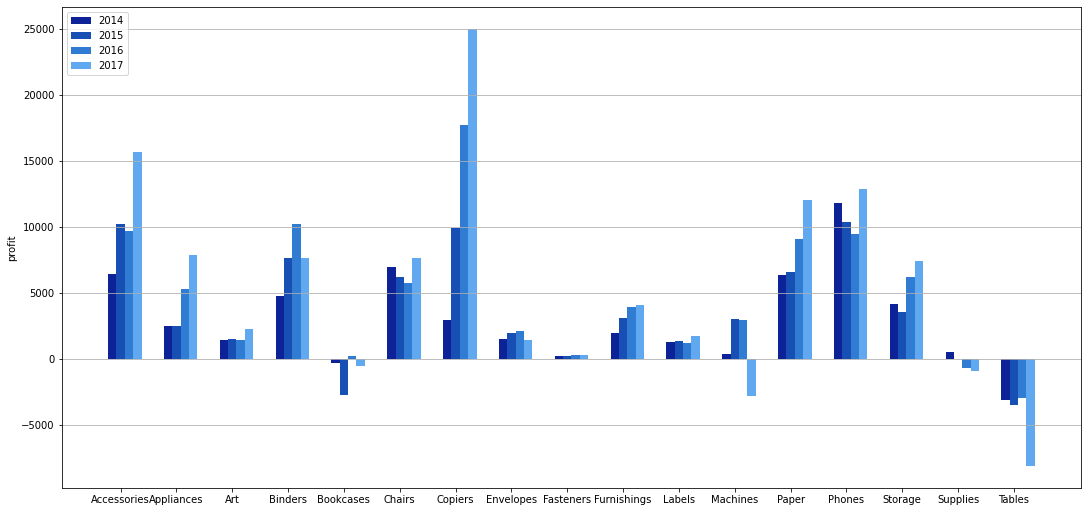

In [8]:
x = np.arange(len(sub_category))
width = 0.15
multiplier = 0


fig, ax = plt.subplots(constrained_layout=True, figsize=(15, 7))

for attribute, measurement in values.items():
    
    rgb = (
        (12*(5**(-multiplier))*(10**multiplier))/255,
        (34+(45*multiplier))/255,
        (150+(30*multiplier))/255,
    )    
    
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = rgb)
    multiplier += 1

ax.set_ylabel('profit')
ax.set_xticks(x + width, sub_category)
ax.legend(loc='upper left')
ax.grid(axis = 'y')

plt.show()